### Download dataset from Kaggle, fashion_mnist

todo: explain why we choose to use fashion_mnist

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

training_set = pd.read_csv('Dataset/fashion_data/fashion-mnist_train.csv')
test_set = pd.read_csv('Dataset/fashion_data/fashion-mnist_test.csv')

print(training_set.shape)
print(test_set.shape)

perform data cleaning

In [4]:
# X is pixels, y is labels
y_train = training_set.iloc[:, 0].to_numpy()
X_train = training_set.iloc[:, 1:].to_numpy()
y_test = test_set.iloc[:, 0].to_numpy()
X_test = test_set.iloc[:, 1:].to_numpy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


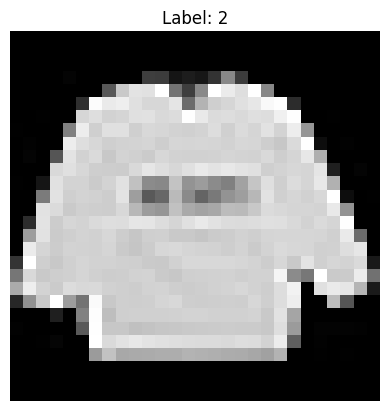

In [5]:
#visualising one image

# choosing the first image
image_array = X_train[0]
label = y_train[0]

# reshape 784 to 28x28
image_array = image_array.reshape(28, 28)

# plotting the image
plt.imshow(image_array, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [6]:
# rescaling the pixel values down to values between 0 - 1 for efficiency of neural network

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train[:5])
print(X_test[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21960784 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [7]:
# one hot encoding for labels

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(y_train.shape)
print(y_train[:5])


(60000, 10)
       0      1      2      3      4      5      6      7      8      9
0  False  False   True  False  False  False  False  False  False  False
1  False  False  False  False  False  False  False  False  False   True
2  False  False  False  False  False  False   True  False  False  False
3   True  False  False  False  False  False  False  False  False  False
4  False  False  False   True  False  False  False  False  False  False


In [8]:
# for reproducibility
np.random.seed(42)

# architecture of the neural network
input_nodes = X_train.shape[1]     
hidden_nodes = 128             
output_nodes = 10

In [9]:
def create_weights(rows, cols):
    # generate random numbers from normal distribution
    return np.random.randn(rows, cols)

In [10]:
w1 = create_weights(input_nodes, hidden_nodes)
b1 = np.zeros((w1.shape[0], 1))

w2 = create_weights(hidden_nodes, output_nodes)
b2 = np.zeros((w2.shape[0], 1))

print(w1.shape, b1.shape, w2.shape, b2.shape)

(784, 128) (784, 1) (128, 10) (128, 1)


In [11]:
# activation functions and its derivatives
def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)
    
def softmax(x):
    np.exp(x)/sum(np.exp(x))


In [1]:
def forward_prop(X, w1, b1, w2, b2):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    
    z2 = np.dot(a1, w2) + b2
    a2 = softmax(z2)
    return a2

def neg_log_likelihood(y, y_hat):
    return -1/len(y) * np.sum(np.sum(y * np.log(y_hat)))